###Set working directory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Face_Recognition_with_SVM

/content/drive/MyDrive/Colab Notebooks/Face_Recognition_with_SVM


###Import essential libraries

In [3]:
from PIL import Image
import os
import re

from skimage.feature import hog

import matplotlib.pyplot as plt
import numpy as np

import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC


###Load new image

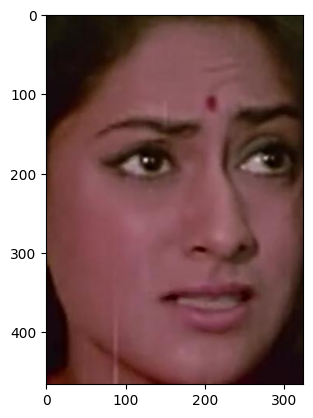

In [8]:
target_names=['AamirKhan', 'JayaBadhuri', 'HritikRoshan', 'AnupamKher']

# Uncomment different examples

# img = Image.open('/content/drive/MyDrive/Colab Notebooks/Face_Recognition_with_SVM/a2_NewPhotos/Amir_21.jpg')
# img = Image.open('/content/drive/MyDrive/Colab Notebooks/Face_Recognition_with_SVM/a2_NewPhotos/HirtikRoshan_237.jpg')
# img = Image.open("/content/drive/MyDrive/Colab Notebooks/Face_Recognition_with_SVM/a2_NewPhotos/AmitabhBachan_34.jpg")
# img = Image.open('/content/drive/MyDrive/Colab Notebooks/Face_Recognition_with_SVM/a2_NewPhotos/AnupamKher_11.jpg')      # misclassification
img = Image.open('/content/drive/MyDrive/Colab Notebooks/Face_Recognition_with_SVM/a2_NewPhotos/JayaBhaduri_24.jpg')


plt.imshow(img)


###Obtain image feature & label

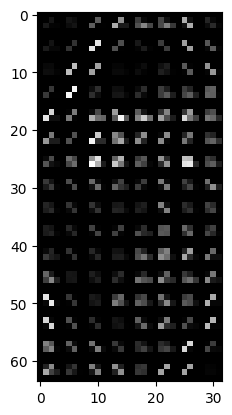

In [9]:
img = img.resize([32, 64])

# Replace 'multichannel=True' with 'channel_axis=-1'
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True, channel_axis=-1)
hog_image.shape
plt.imshow(hog_image, cmap='gray')

X = fd


In [10]:
X.shape

(3780,)

###Predictions on new image

In [11]:
import joblib
clf = joblib.load('/content/drive/MyDrive/Colab Notebooks/Face_Recognition_with_SVM/c2_FR_svm_classifier.pkl')
threshold=0.6
X = np.transpose(X.reshape(-1, 1))
if clf.predict_proba(X).max()>=threshold:
  y_pred=target_names[clf.predict_proba(X).argmax()]
  prob=clf.predict_proba(X).max()
else:
  y_pred='Unidentified'
  prob=clf.predict_proba(X).max()

print('Identified as '+ str(y_pred)+ " with confidence "+str(round(prob*100))+ '%')

Identified as JayaBadhuri with confidence 88%
